In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from scipy import stats

In [2]:
data = pd.read_csv('dog_rates_tweets.csv')
data.index.names = ['tweet number']

In [3]:
ratings = data['text'].str.extractall(r'(\d+(\.\d+)?)/10')
ratings.drop([1], axis=1, inplace=True)
ratings

,,0
tweet number,match,
2,0,14
7,0,13
8,0,14
24,0,13
30,0,13
...,...,...
7363,0,14
7369,0,14
7381,0,13


In [4]:
ratings[0] = ratings[0].astype(float)
ratings = ratings.rename(columns={0: 'rating'})

In [5]:
ratings['outlier'] = ratings['rating'] > 25
ratings

,,rating,outlier
tweet number,match,,
2,0,14.0,False
7,0,13.0,False
8,0,14.0,False
24,0,13.0,False
30,0,13.0,False
...,...,...,...
7363,0,14.0,False
7369,0,14.0,False
7381,0,13.0,False


In [6]:
dates = data['created_at']
dates

tweet number
0       2018-05-10 20:36:44
1       2018-05-09 23:54:02
2       2018-05-09 23:48:56
3       2018-05-09 22:02:03
4       2018-05-09 01:19:40
               ...         
8510    2018-08-10 18:12:18
8511    2018-08-10 17:56:00
8512    2018-08-10 17:30:12
8513    2018-08-10 17:19:32
8514    2018-08-10 17:01:01
Name: created_at, Length: 8515, dtype: object

In [7]:
rated_with_dates = pd.merge(dates, ratings, on='tweet number')
rated_with_dates.reset_index
rated_with_dates

,created_at,rating,outlier
tweet number,,,
2,2018-05-09 23:48:56,14.0,False
7,2018-05-08 16:23:07,13.0,False
8,2018-05-07 23:11:58,14.0,False
24,2018-05-04 00:25:48,13.0,False
30,2018-05-02 18:19:39,13.0,False
...,...,...,...
7363,2018-08-23 20:25:53,14.0,False
7369,2018-08-22 16:55:26,14.0,False
7381,2018-08-21 00:16:09,13.0,False


In [8]:
rated_with_dates['time of tweet'] = pd.to_datetime(rated_with_dates['created_at'])
rated_with_dates

,created_at,rating,outlier,time of tweet
tweet number,,,,
2,2018-05-09 23:48:56,14.0,False,2018-05-09 23:48:56
7,2018-05-08 16:23:07,13.0,False,2018-05-08 16:23:07
8,2018-05-07 23:11:58,14.0,False,2018-05-07 23:11:58
24,2018-05-04 00:25:48,13.0,False,2018-05-04 00:25:48
30,2018-05-02 18:19:39,13.0,False,2018-05-02 18:19:39
...,...,...,...,...
7363,2018-08-23 20:25:53,14.0,False,2018-08-23 20:25:53
7369,2018-08-22 16:55:26,14.0,False,2018-08-22 16:55:26
7381,2018-08-21 00:16:09,13.0,False,2018-08-21 00:16:09


In [9]:
rated_with_dates.describe()

,rating
count,1685.000000
mean,15.450445
std,67.143174
min,0.000000
25%,11.000000
50%,12.000000
75%,13.000000
max,1776.000000


In [10]:
outliers_removed = rated_with_dates[~(rated_with_dates['outlier'])]

In [11]:
outliers_removed.describe()

,rating
count,1677.000000
mean,11.751938
std,1.667494
min,0.000000
25%,11.000000
50%,12.000000
75%,13.000000
max,17.000000


In [12]:
def to_timestamp_single(data):
    return data.timestamp()
to_timestamp = np.vectorize(to_timestamp_single, otypes=[np.float64])

In [13]:
outliers_removed['timestamp'] = outliers_removed.loc[:, ('time of tweet')].apply(to_timestamp)
outliers_removed

/var/folders/jd/f_rvzywd5j7g5f9ckcp7wsxr0000gp/T/ipykernel_56774/1146856316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['timestamp'] = outliers_removed.loc[:, ('time of tweet')].apply(to_timestamp)


,created_at,rating,outlier,time of tweet,timestamp
tweet number,,,,,
2,2018-05-09 23:48:56,14.0,False,2018-05-09 23:48:56,1.525910e+09
7,2018-05-08 16:23:07,13.0,False,2018-05-08 16:23:07,1.525797e+09
8,2018-05-07 23:11:58,14.0,False,2018-05-07 23:11:58,1.525735e+09
24,2018-05-04 00:25:48,13.0,False,2018-05-04 00:25:48,1.525394e+09
30,2018-05-02 18:19:39,13.0,False,2018-05-02 18:19:39,1.525285e+09
...,...,...,...,...,...
7363,2018-08-23 20:25:53,14.0,False,2018-08-23 20:25:53,1.535056e+09
7369,2018-08-22 16:55:26,14.0,False,2018-08-22 16:55:26,1.534957e+09
7381,2018-08-21 00:16:09,13.0,False,2018-08-21 00:16:09,1.534811e+09


In [14]:
fit = stats.linregress(outliers_removed['timestamp'], outliers_removed['rating'])

In [15]:
fit.slope, fit.intercept

(3.5654075470099167e-08, -41.207809617433135)

In [16]:
outliers_removed['prediction'] = outliers_removed['timestamp']*fit.slope + fit.intercept
outliers_removed

/var/folders/jd/f_rvzywd5j7g5f9ckcp7wsxr0000gp/T/ipykernel_56774/1121522720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['prediction'] = outliers_removed['timestamp']*fit.slope + fit.intercept


,created_at,rating,outlier,time of tweet,timestamp,prediction
tweet number,,,,,,
2,2018-05-09 23:48:56,14.0,False,2018-05-09 23:48:56,1.525910e+09,13.197091
7,2018-05-08 16:23:07,13.0,False,2018-05-08 16:23:07,1.525797e+09,13.193057
8,2018-05-07 23:11:58,14.0,False,2018-05-07 23:11:58,1.525735e+09,13.190851
24,2018-05-04 00:25:48,13.0,False,2018-05-04 00:25:48,1.525394e+09,13.178687
30,2018-05-02 18:19:39,13.0,False,2018-05-02 18:19:39,1.525285e+09,13.174823
...,...,...,...,...,...,...
7363,2018-08-23 20:25:53,14.0,False,2018-08-23 20:25:53,1.535056e+09,13.523191
7369,2018-08-22 16:55:26,14.0,False,2018-08-22 16:55:26,1.534957e+09,13.519660
7381,2018-08-21 00:16:09,13.0,False,2018-08-21 00:16:09,1.534811e+09,13.514442


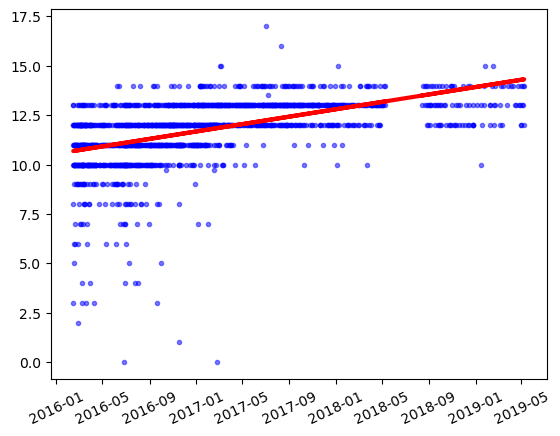

In [17]:
plt.xticks(rotation=25)
plt.plot(outliers_removed['time of tweet'], outliers_removed['rating'], 'b.', alpha=0.5)
plt.plot(outliers_removed['time of tweet'], outliers_removed['prediction'], 'r-', linewidth=3)
plt.show()